# Create bar chart or histogram to visualize the distribution of categorical or continuous variable 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = sns.load_dataset('penguins')
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
df.duplicated().sum()

0

In [12]:
df.columns.duplicated()

array([False, False, False, False, False, False, False])

In [14]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [16]:
numerical = df.select_dtypes(include='number')
numerical.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [18]:
for col in numerical:
    numerical[col] = numerical[col].fillna(numerical[col].median())

numerical

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10,18.7,181.0,3750.0
1,39.50,17.4,186.0,3800.0
2,40.30,18.0,195.0,3250.0
3,44.45,17.3,197.0,4050.0
4,36.70,19.3,193.0,3450.0
...,...,...,...,...
339,44.45,17.3,197.0,4050.0
340,46.80,14.3,215.0,4850.0
341,50.40,15.7,222.0,5750.0
342,45.20,14.8,212.0,5200.0


In [20]:
categorical = df.select_dtypes(include='object')

In [22]:
for col in categorical:
  categorical[col] = categorical[col].fillna(categorical[col].mode()[0])

categorical

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
3,Adelie,Torgersen,Male
4,Adelie,Torgersen,Female
...,...,...,...
339,Gentoo,Biscoe,Male
340,Gentoo,Biscoe,Female
341,Gentoo,Biscoe,Male
342,Gentoo,Biscoe,Female


In [24]:
df = pd.concat([numerical, categorical], axis=1)
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,island,sex
0,39.10,18.7,181.0,3750.0,Adelie,Torgersen,Male
1,39.50,17.4,186.0,3800.0,Adelie,Torgersen,Female
2,40.30,18.0,195.0,3250.0,Adelie,Torgersen,Female
3,44.45,17.3,197.0,4050.0,Adelie,Torgersen,Male
4,36.70,19.3,193.0,3450.0,Adelie,Torgersen,Female


In [28]:
df.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
species              0
island               0
sex                  0
dtype: int64

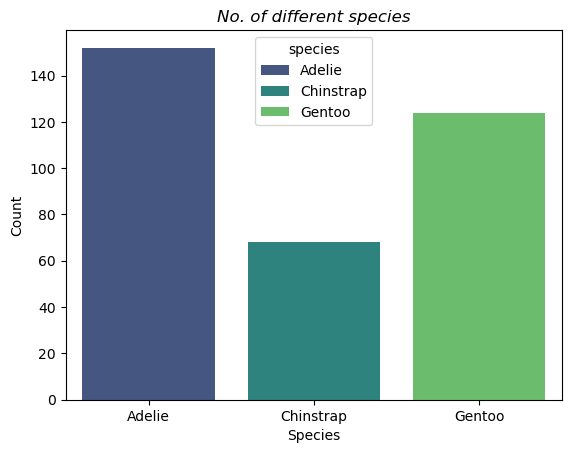

In [94]:
sns.countplot(x='species', data=df, palette='viridis', hue='species', legend=True)
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("No. of different species", style='oblique')
plt.show()

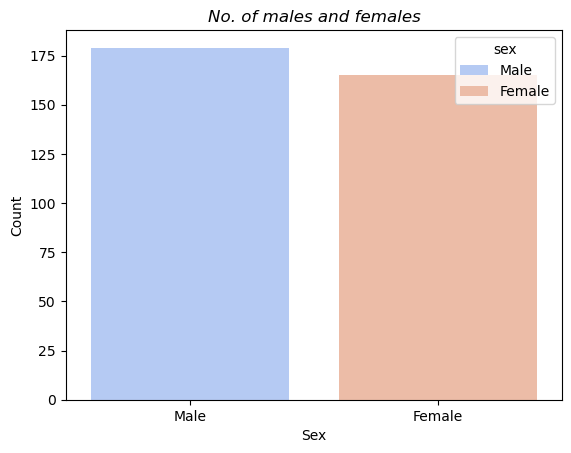

In [92]:
sns.countplot(x='sex', data=df, palette='coolwarm', hue='sex', legend=True)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("No. of males and females", style='oblique')
plt.show()

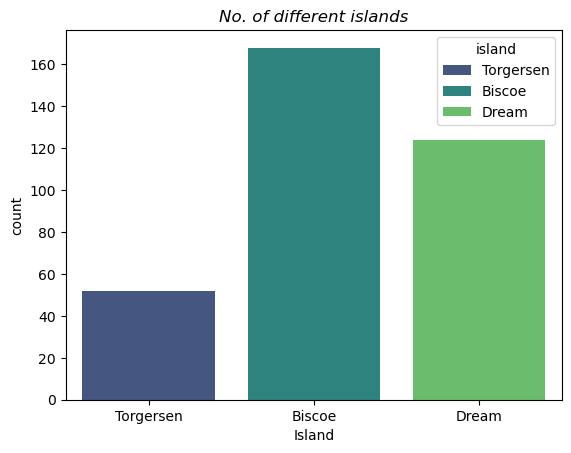

In [88]:
sns.countplot(x='island', data=df, palette='viridis', hue='island', legend=True)
plt.xlabel("Island")
plt.ylabel("Count")
plt.title("No. of different islands", style='oblique')
plt.show()

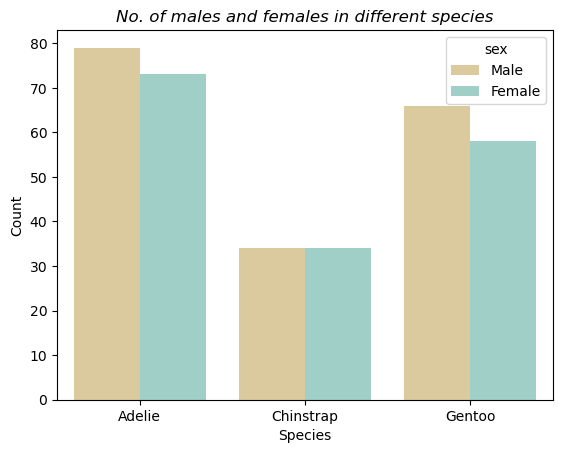

In [90]:
sns.countplot(x='species', data=df, palette='BrBG', hue='sex', legend=True)
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("No. of males and females in different species", style='oblique')
plt.show()

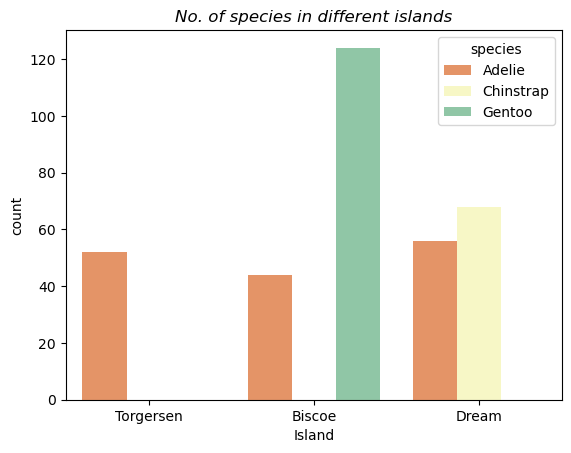

In [86]:
sns.countplot(x='island', data=df, palette='Spectral', hue='species', legend=True)
plt.xlabel("Island")
plt.ylabel("count")
plt.title("No. of species in different islands", style='oblique')
plt.show()

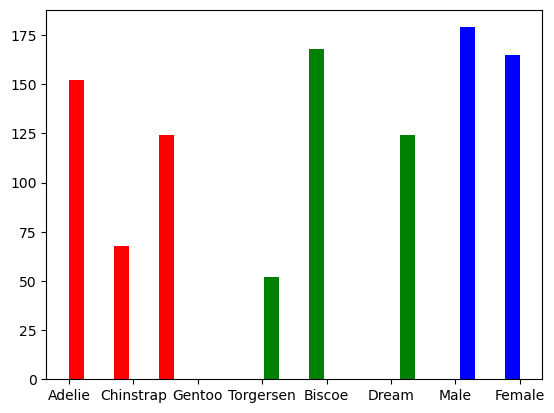

In [46]:
plt.hist(categorical, color=['red','green','blue'],rwidth=5,density=False, cumulative=False)
plt.show()